## The goal of the dataset is to predict whether the patient has 10-year risk of future (CHD) coronary heart disease.
https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv("framingham.csv")
print(data.head())
print(data.shape)
#type(data)

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

# STEP 1: Data preprocessing
## Handling Null values 


In [2]:
print(data.isnull().sum())
print(data.info())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   t

### Approach 1: Let's simply drop columns with na values and see the model performance. 

In [3]:
data = data.dropna(axis=1)
print(data.isnull().sum())
print("****************************************************************************")
print(data.head())

male               0
age                0
currentSmoker      0
prevalentStroke    0
prevalentHyp       0
diabetes           0
sysBP              0
diaBP              0
TenYearCHD         0
dtype: int64
****************************************************************************
   male  age  currentSmoker  prevalentStroke  prevalentHyp  diabetes  sysBP  \
0     1   39              0                0             0         0  106.0   
1     0   46              0                0             0         0  121.0   
2     1   48              1                0             0         0  127.5   
3     0   61              1                0             1         0  150.0   
4     0   46              1                0             0         0  130.0   

   diaBP  TenYearCHD  
0   70.0           0  
1   81.0           0  
2   80.0           0  
3   95.0           1  
4   84.0           0  


# STEP: 2 Now, it's very important to see the distribution of target variable.

0    3594
1     644
Name: TenYearCHD, dtype: int64


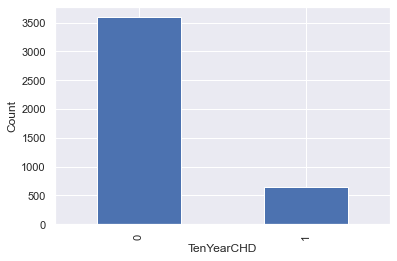

In [4]:
import seaborn as sns

print(data.TenYearCHD.value_counts())

sns.set()
plt_var = data['TenYearCHD'].value_counts().plot(kind="bar")
plt.xlabel("TenYearCHD")
plt.ylabel("Count")
plt.show()


# STEP 3: SLICE THE DATA AND SPLIT 

In [5]:
X = data.iloc[:, :-1]
y = data.iloc[:,-1]


In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))
X.head()

,0,1,2,3,4,5,6,7
0,1.153192,-1.234951,-0.988271,-0.077033,-0.671101,-0.162477,-1.195907,-1.082625
1,-0.867158,-0.418257,-0.988271,-0.077033,-0.671101,-0.162477,-0.515187,-0.158988
2,1.153192,-0.184916,1.011868,-0.077033,-0.671101,-0.162477,-0.220209,-0.242955
3,-0.867158,1.331800,1.011868,-0.077033,1.490089,-0.162477,0.800871,1.016549
4,-0.867158,-0.418257,1.011868,-0.077033,-0.671101,-0.162477,-0.106755,0.092912


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)


# STEP 4: MODEL

In [8]:
from sklearn.linear_model import LogisticRegression


log = LogisticRegression()
log.fit(X_train,y_train)
y_pred= log.predict(X_test)
y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# STEP 5: CHECK ACCURACY

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

0.8384433962264151
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       710
           1       0.56      0.04      0.07       138

    accuracy                           0.84       848
   macro avg       0.70      0.52      0.49       848
weighted avg       0.79      0.84      0.77       848

